# Task-2 : MOVIE RATING PREDICTION WITH PYTHON


In [110]:
# import libaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1. Data Import

In [14]:
# read the data
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\Codsoft Internship\IMDb Movies India.csv",encoding="latin1")
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB


In [17]:
data.describe()

,Year,Rating
count,14981.000000,7919.000000
mean,-1987.012215,5.841621
std,25.416689,1.381777
min,-2022.000000,1.100000
25%,-2009.000000,4.900000
50%,-1991.000000,6.000000
75%,-1968.000000,6.800000
max,-1913.000000,10.000000


### Data Cleaning

In [18]:
# check missing value or NULL values
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [21]:
data.dropna(subset=['Rating','Actor 1','Actor 2','Actor 3','Director','Genre'], inplace = True)

In [22]:
data.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [23]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### convert votes into integer and remove commas 

In [25]:
# convert votes columns
data['Votes'] = data['Votes'].str.replace(',','').astype(int)

### convert year (2019) to 2019 

In [50]:
# convert year columns
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')  # Convert to float
data['Year'] = data['Year'].abs()  # Convert negative values to positive
data['Year'] = data['Year'].fillna(0)  # Replace NaN values with 0
data['Year'] = data['Year'].astype(int)  # Convert to int64

### remove min from duration columns

In [29]:
# convert duration columns
data['Duration'] = data['Duration'].str.strip('min')

In [30]:
data['Duration'].fillna(data['Duration'].median(),inplace=True)

In [51]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int32  
 2   Duration  7558 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int32  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int32(2), object(7)
memory usage: 590.5+ KB


In [53]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### 2. EDA (Exploratory data Analysis)

- **Top 10 Movies**

In [56]:
# find top 10 movies based on rating
# top_movie = data.loc[data['Rating'].sort_values(ascending=False)[:10].index]
top_10_movies = data.sort_values(by='Rating', ascending=False).head(10)
top_10_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,135.0,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


### Distribution of Top 10 movies wrt Year

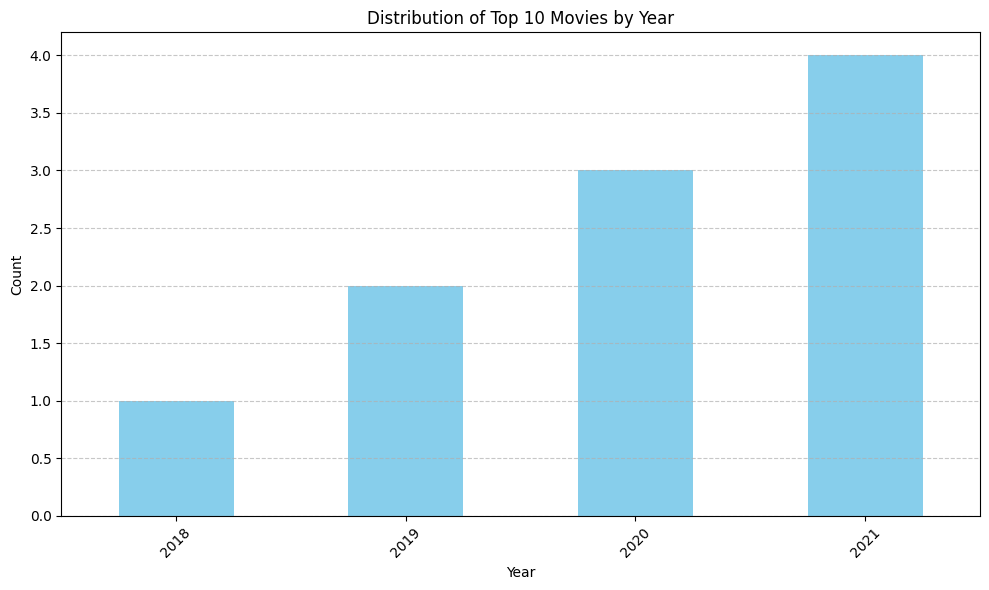

In [130]:
# Create a bar chart
plt.figure(figsize=(10, 6))
top_10_movies['Year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Top 10 Movies by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Distribution of Genre of movies

In [62]:
genre_counts = data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(10)
top_n_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291
5,"Action, Drama",270
6,Comedy,251
7,"Comedy, Drama",237
8,Romance,226
9,"Comedy, Drama, Romance",213


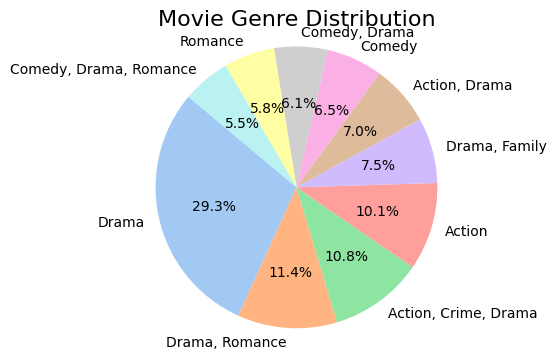

In [63]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

### Distribution of Top directors by average rating

In [71]:
# Group the data by director and calculate the average rating
director_avg_rating = data.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_10_directors = director_avg_rating.head(10)
top_10_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18524\3495158878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_directors, x='Rating', y='Director', palette='viridis')


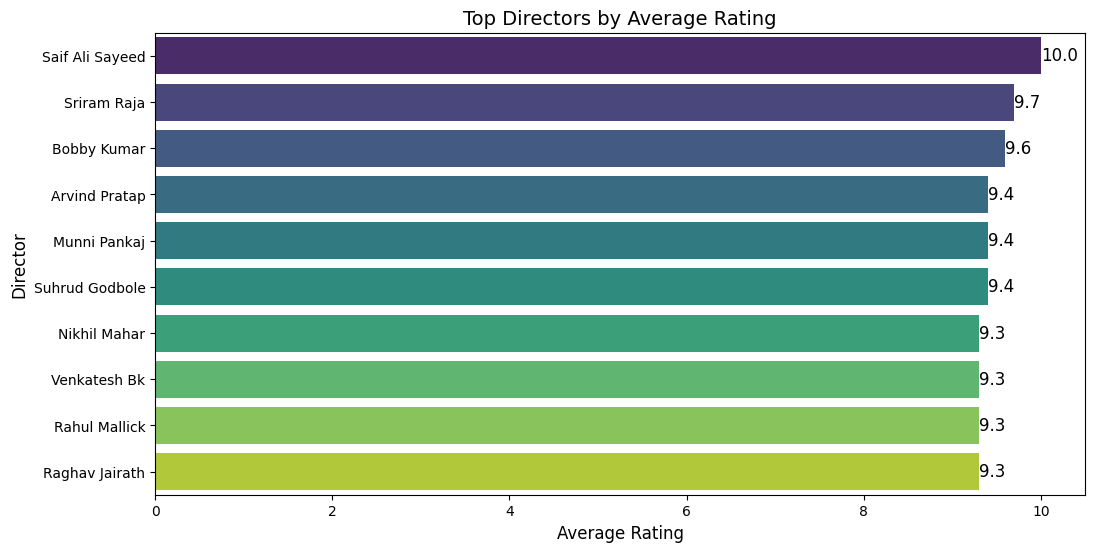

In [86]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_directors, x='Rating', y='Director', palette='viridis')

plt.title('Top Directors by Average Rating', fontsize=14)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Director', fontsize=12)

# Add labels to the bars
for index, value in enumerate(top_10_directors['Rating']):
    plt.text(value, index, str(value), fontsize=12, ha='left', va='center')

plt.show()

### Relationship between the number of votes and movie ratings

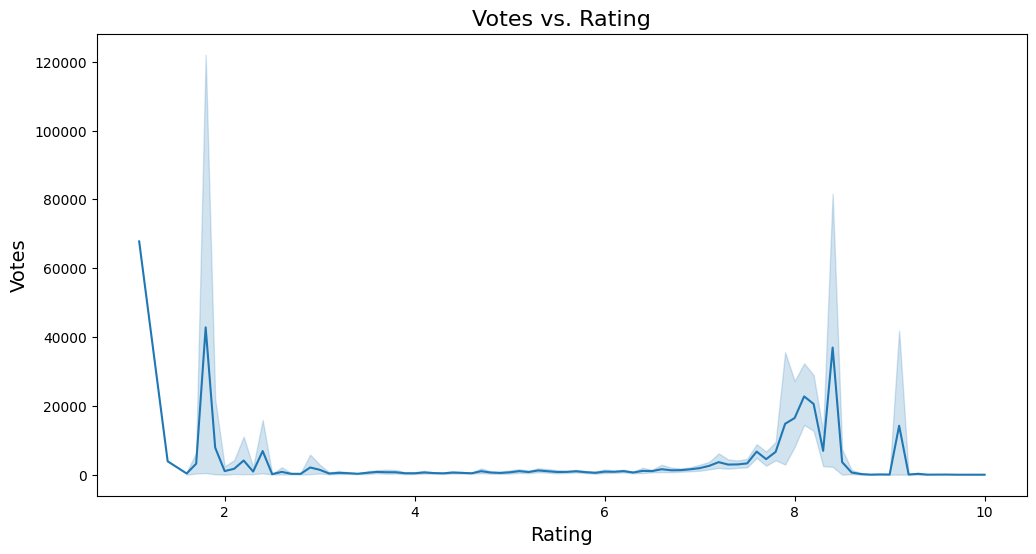

In [88]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Rating', y='Votes')

plt.title('Votes vs. Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Votes', fontsize=14)
plt.show()

### Distribution of top actors by number of movie

In [78]:
actor_counts = data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_10_actors = actor_counts.head(10)
top_10_actors

,Actor,MovieCount
0,Jeetendra,140
1,Dharmendra,134
2,Mithun Chakraborty,130
3,Ashok Kumar,125
4,Rajesh Khanna,118
5,Amitabh Bachchan,116
6,Dev Anand,90
7,Shashi Kapoor,88
8,Akshay Kumar,82
9,Sanjay Dutt,73


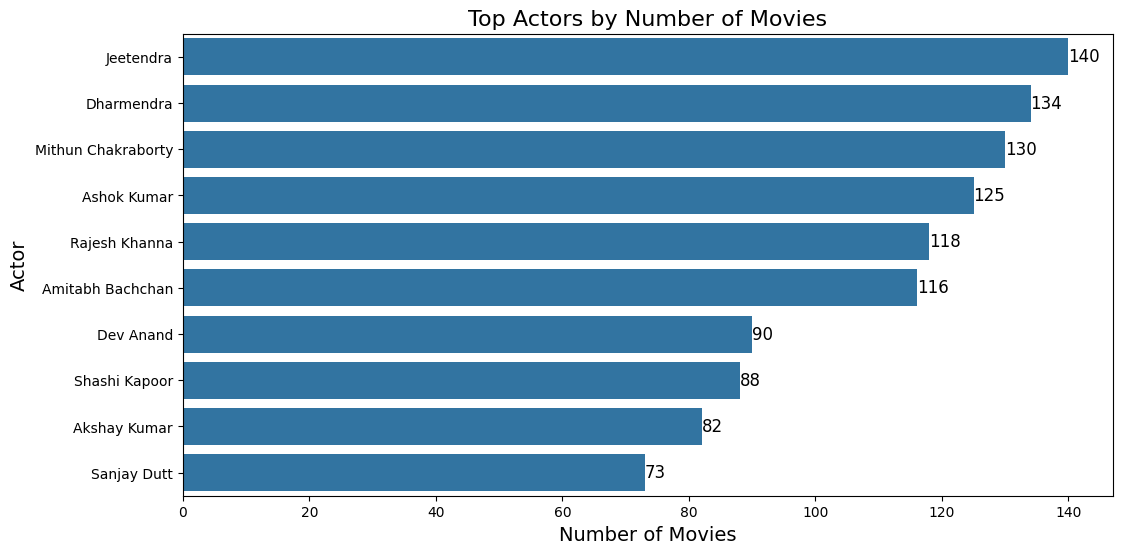

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_actors, x='MovieCount', y='Actor', orient='h')

# Set plot labels and title
plt.title('Top 10 Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Add labels to the bars
for index, value in enumerate(top_10_actors['MovieCount']):
    plt.text(value, index, str(value), fontsize=12, ha='left', va='center')

# Show the plot
plt.show()


### Distribution of number of movie released every year

In [83]:
yearly_movie_counts = data['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
91,1917,1
88,1931,3
89,1932,2
86,1933,4
90,1934,2
...,...,...
1,2017,223
2,2018,214
0,2019,238
9,2020,157


### Distribution of Movies with rating greater than 8 and votes greater than 10000

In [92]:
filtered_df = data[(data['Rating'] > 8) & (data['Votes'] > 10000)]
filtered_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18524\246636585.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


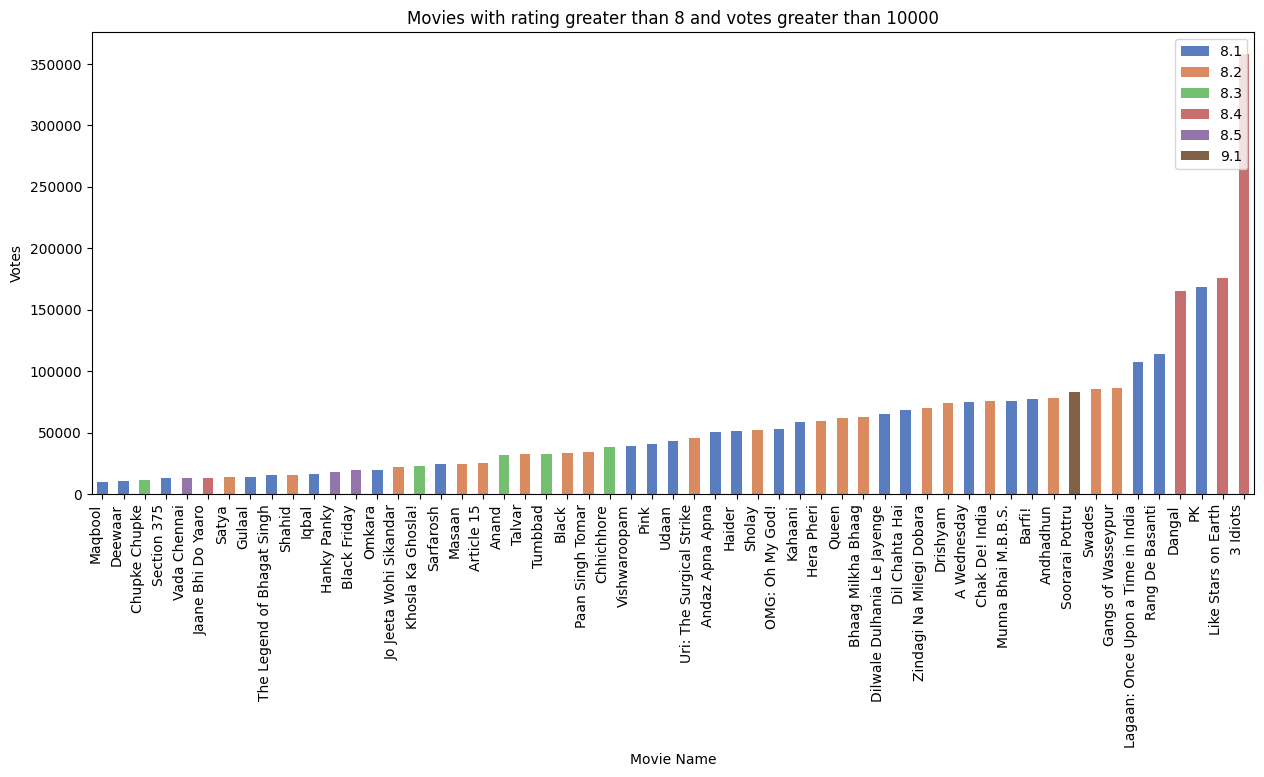

In [101]:
# Sort the DataFrame by 'Votes' in ascending order
filtered_df_sorted = filtered_df.sort_values(by='Votes',ascending=True)

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=filtered_df_sorted, x='Name', y='Votes', hue='Rating', dodge=False, width=0.5, palette='muted')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 10000')

plt.show()


## Distribution of Durations of movies by years

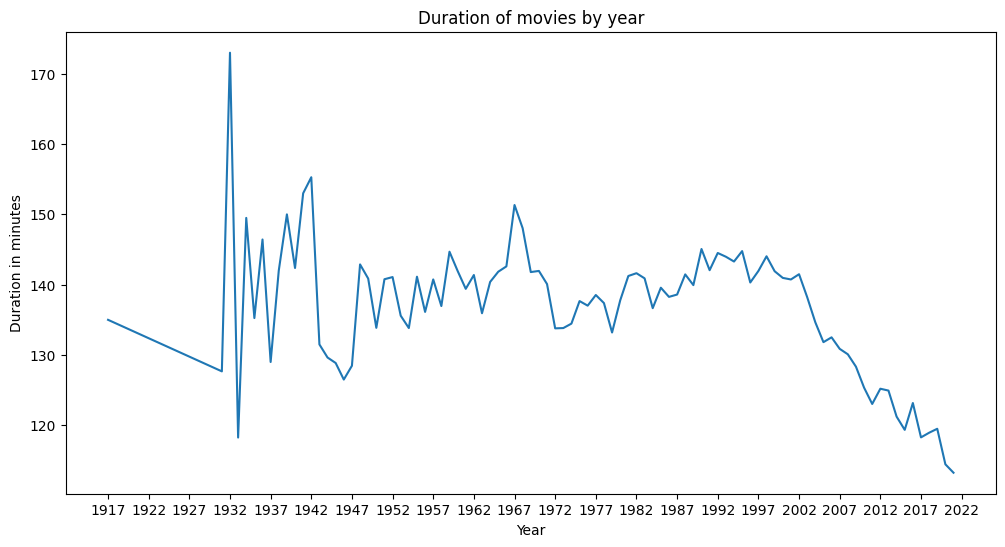

In [111]:
data['Duration'] = data['Duration'].astype(int)
data['Year'] = data['Year'].astype(int)


plt.figure(figsize=(12, 6))
sns.lineplot(data=data,x='Year',y='Duration',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1917,2023,5))
plt.show()

### Distribution of Number of movies each genre

In [112]:
data['Genre'] = data['Genre'].str.split(',')

# Create a new DataFrame with one row for each genre
genre_df = data.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,135,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18524\3722011826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')


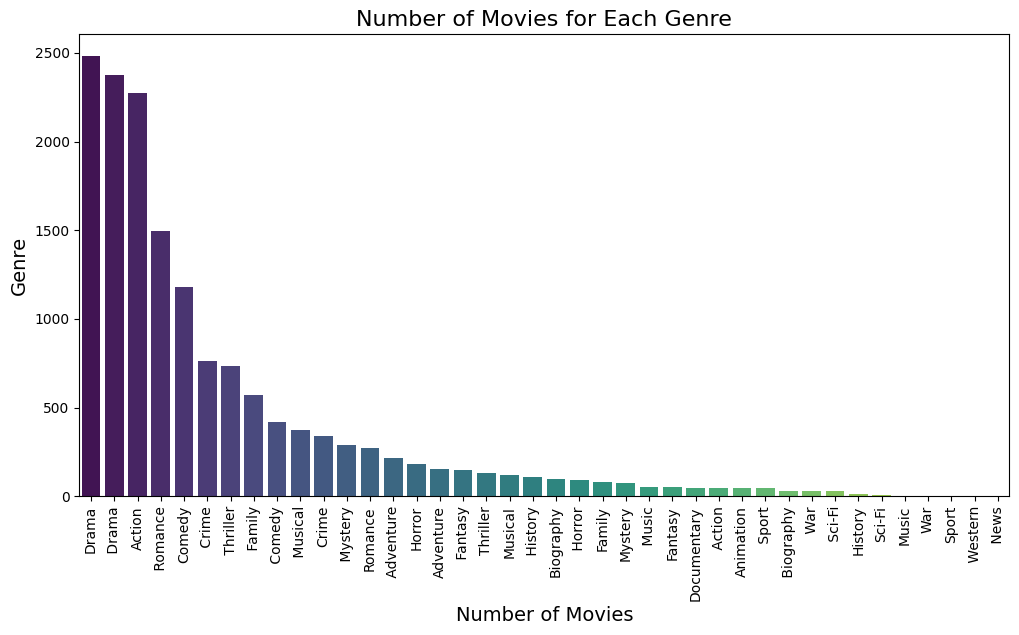

In [114]:

plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)

plt.show()

### Distribution of Average rating of movies in each genre

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18524\1121514635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='coolwarm')


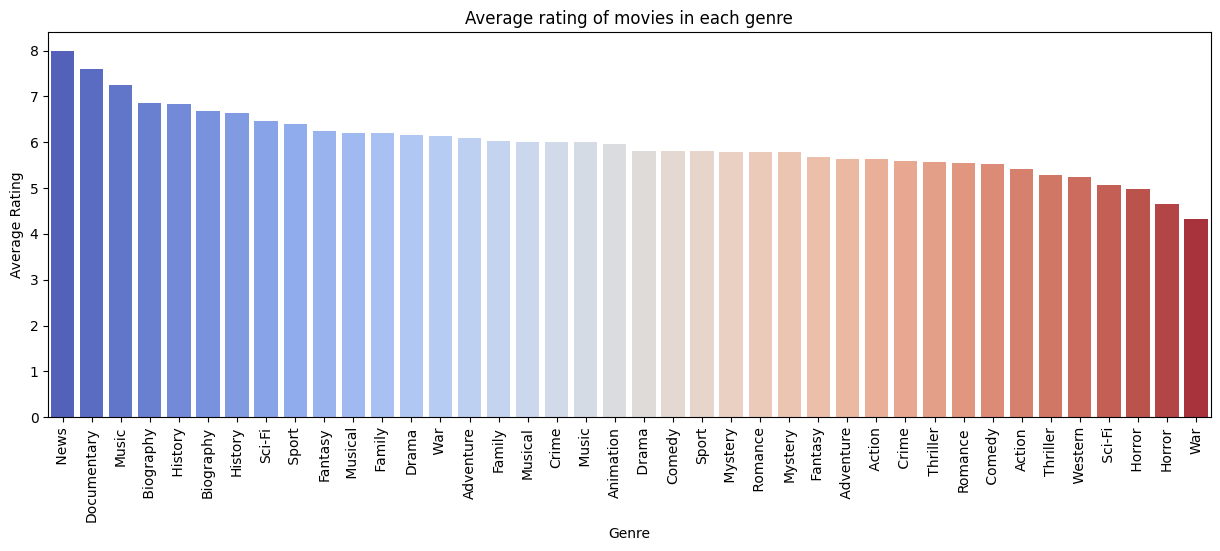

In [119]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)

plt.show()

### Featured Engineering

In [115]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = data.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(data['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(data['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(data['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,252,7.0,8,755,1686,2725,373
3,2019,110,205,4.4,35,1637,1500,865,2543
5,1997,147,175,4.7,827,1881,481,84,2422
6,2005,142,315,7.4,1086,2486,878,1346,2996
8,2012,82,351,5.6,326,161,2385,1416,1189


In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


### Examine Correlation of Data

In [121]:
# correlation
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Votes       0.134655
Genre       0.122565
Actor 2     0.038852
Actor 3     0.031550
Actor 1     0.025089
Duration   -0.001801
Director   -0.003678
Year       -0.194990
Name: Rating, dtype: float64

<Axes: >

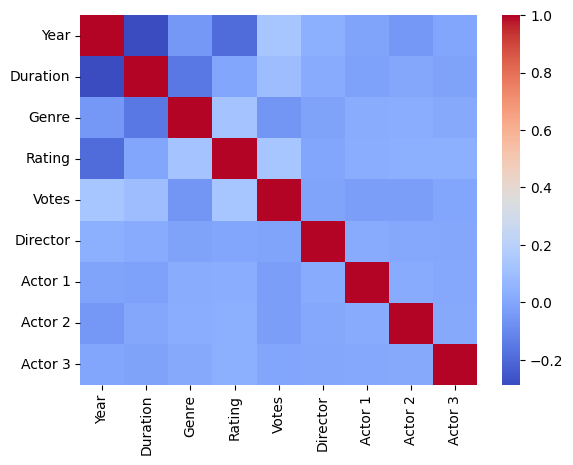

In [122]:
sns.heatmap(corr_df,annot=False,cmap="coolwarm")

**Now our transformed columns are much correlated with the target variable so we are ready to go**

## Model Building

In [123]:
# Import modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [124]:
# put data except Rating data
X = trans_data.drop(['Rating'],axis=1)

# Put only Rating data
y = trans_data['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [125]:
X_test = np.array(X_test)

In [126]:
y_pred = model.predict(X_test)
y_pred

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.38173569, 6.27438422, 6.24148256, ..., 5.6990634 , 6.25823896,
       6.09526622])

In [127]:
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.08483347672034802
Mean squared error:  1.6972873264362
Mean absolute error:  1.0286370452288054


In [128]:
print(y_test)

6241     7.4
3321     4.9
6117     6.5
5975     5.7
6653     7.0
        ... 
14566    3.5
10966    5.2
10168    2.7
14796    4.9
2785     8.0
Name: Rating, Length: 2268, dtype: float64
